# 1️⃣ Data preparation and normalization

#### Loading the dataset

In [13]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/spotify_songs.csv')

# Display the first few rows to understand its structure
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


#### Processing the initial data
- Corrupting 12% of the subset rows by introducing at least one empty cell.
- Saving the result

In [14]:
import numpy as np

# Calculate the number of rows to corrupt
num_rows_to_corrupt = int(0.12 * len(data))

# Randomly select rows to corrupt
rows_to_corrupt = np.random.choice(data.index, size=num_rows_to_corrupt, replace=False)

# For each selected row, randomly select a non-integer column to set to NaN
for row in rows_to_corrupt:
    col_to_corrupt = np.random.choice(data.columns)
    while data[col_to_corrupt].dtype == np.int64:
        col_to_corrupt = np.random.choice(data.columns)
    data.at[row, col_to_corrupt] = np.nan

# Save the corrupted dataframe to a new CSV file
corrupted_filename = "data/spotify_songs_corrupted.csv"
data.to_csv(corrupted_filename, index=False)

corrupted_filename

'data/spotify_songs_corrupted.csv'

## Visualization of significant features

#### a. Visualization of Significant Features

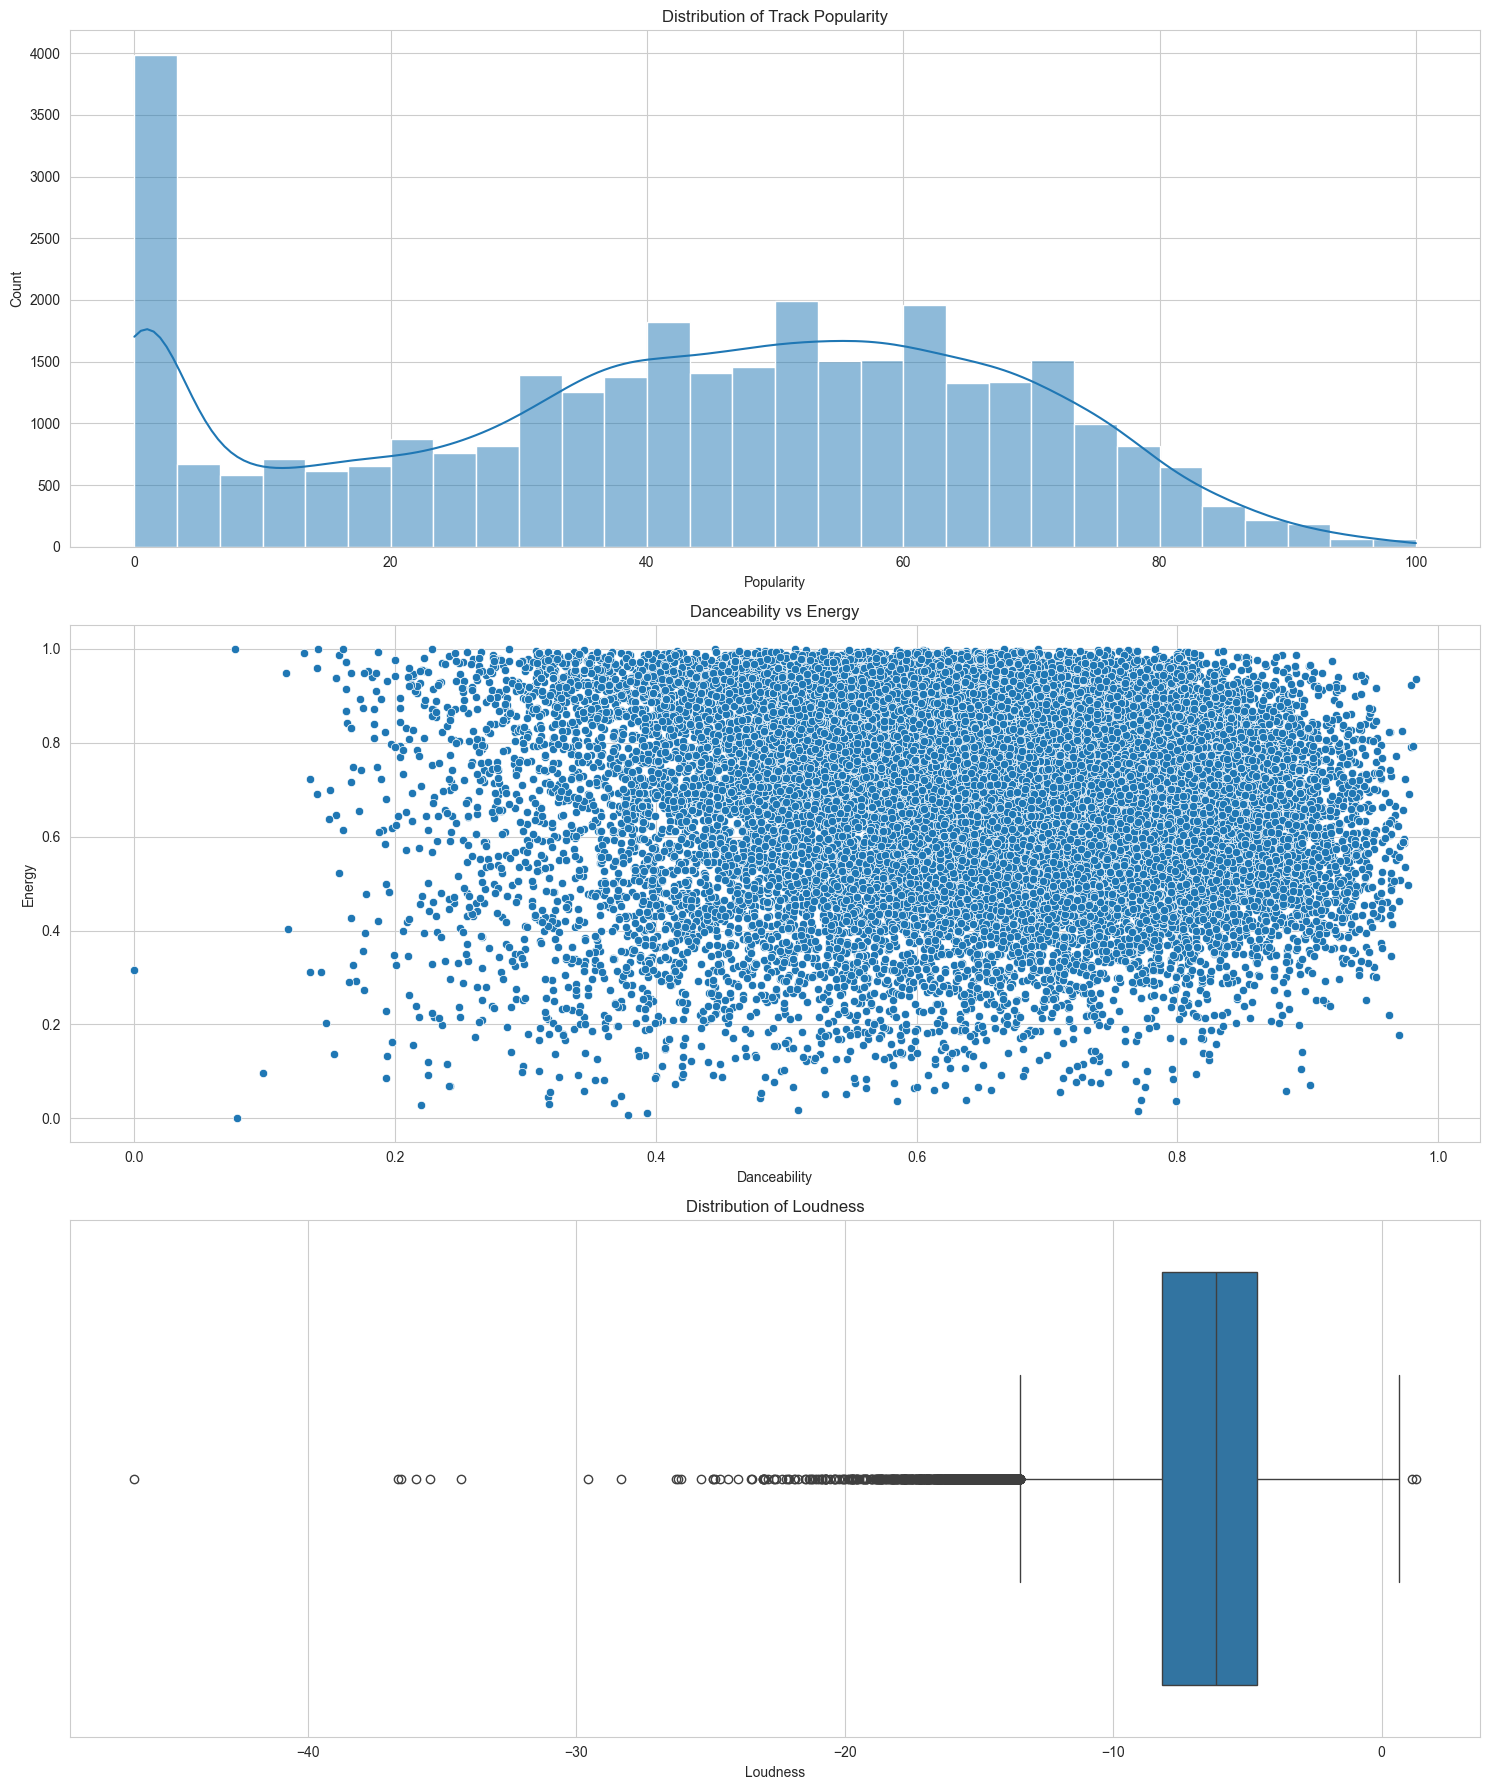

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

# Histogram for track_popularity
sns.histplot(data['track_popularity'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Track Popularity')
ax[0].set_xlabel('Popularity')
ax[0].set_ylabel('Count')

# Scatter plot for danceability vs energy
sns.scatterplot(x='danceability', y='energy', data=data, ax=ax[1])
ax[1].set_title('Danceability vs Energy')
ax[1].set_xlabel('Danceability')
ax[1].set_ylabel('Energy')

# Box plot for loudness
sns.boxplot(x=data['loudness'], ax=ax[2])
ax[2].set_title('Distribution of Loudness')
ax[2].set_xlabel('Loudness')

plt.tight_layout()
plt.show()

#### b. Data cleaning

In [20]:
# 1. Removing rows with missing values
data_cleaned = data.dropna()

# 2. Normalizing numerical features (using Min-Max scaling for this demonstration)
numerical_features = data_cleaned.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    data_cleaned[feature] = (data_cleaned[feature] - data_cleaned[feature].min()) / (data_cleaned[feature].max() - data_cleaned[feature].min())

# 3. Removing duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Display the shape of the original and cleaned dataframes to see the difference
original_shape = data.shape
cleaned_shape = data_cleaned.shape

original_shape, cleaned_shape

# Save cleaned subset to a CSV file
file_path = "data/spotify_songs_cleaned.csv"
data_cleaned.to_csv(file_path, index=False)
file_path

C:\Users\alexe\AppData\Local\Temp\ipykernel_15812\3193936658.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[feature] = (data_cleaned[feature] - data_cleaned[feature].min()) / (data_cleaned[feature].max() - data_cleaned[feature].min())
C:\Users\alexe\AppData\Local\Temp\ipykernel_15812\3193936658.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[feature] = (data_cleaned[feature] - data_cleaned[feature].min()) / (data_cleaned[feature].max() - data_cleaned[feature].min())
C:\Use

'data/spotify_songs_cleaned.csv'

#### c. Data Correlation (correlation matrix)

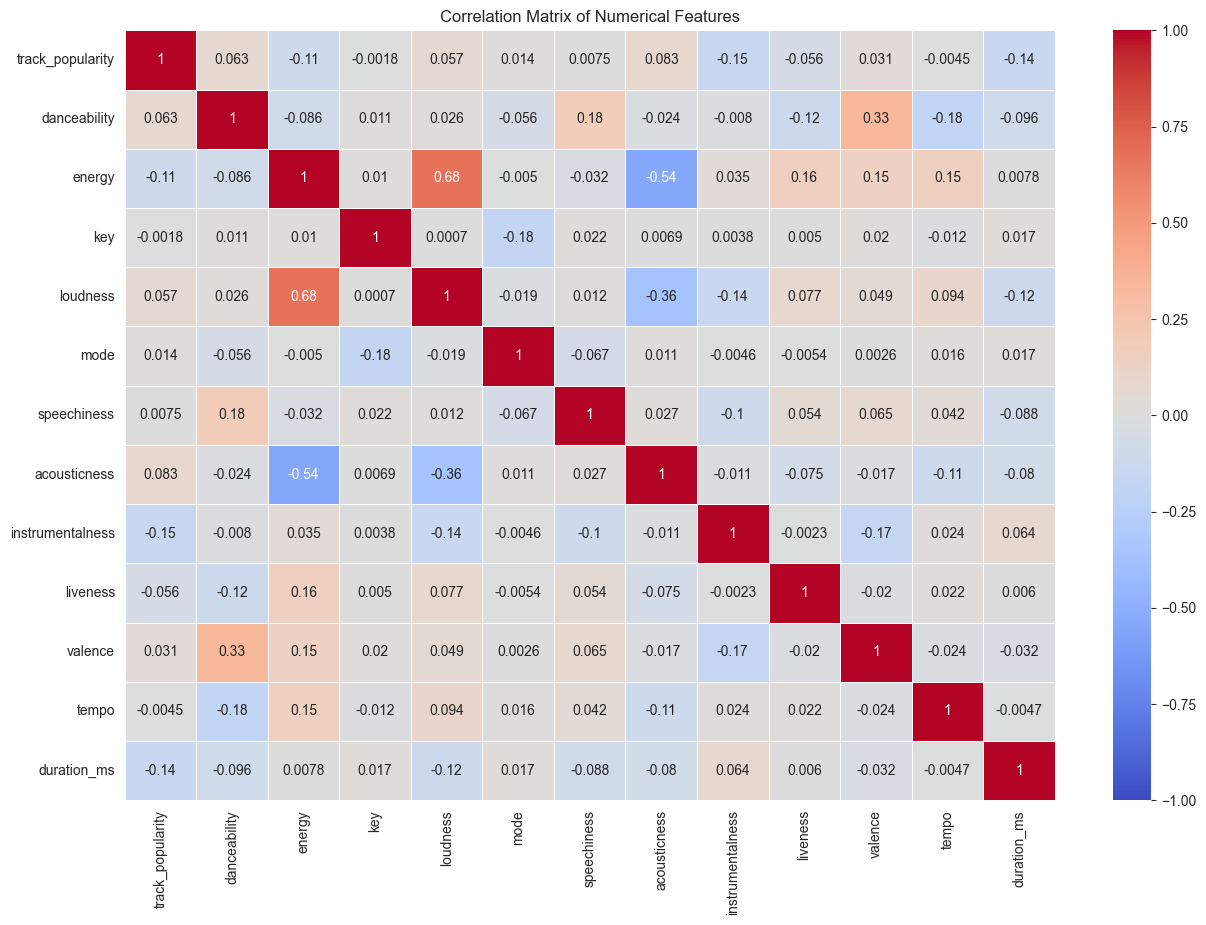

In [17]:
# Compute the correlation matrix
correlation_matrix = data_cleaned[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2️⃣ Classification

## Model training using Grid Search for the specified algorithms


#### KNN: K-Nearest Neighbors

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Selecting a smaller subset of data for faster computation
data_subset = data_cleaned.sample(2000, random_state=42)


# Features and target for Genre Classification
X = data_subset[numerical_features]
y = data_subset['playlist_genre']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reducing the Grid Search parameters for faster computation
param_grid_reduced = {
    'KNN': {
        'n_neighbors': [5, 7],
        'metric': ['euclidean', 'manhattan']
    },
    'SVM': {
        'C': [1],
        'kernel': ['linear']
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [5, 10]
    }
}

# Using Grid Search to find the best parameters and train the model
results_reduced = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid_reduced[model_name], cv=5)
    grid_search.fit(X_train, y_train)
    predictions = grid_search.predict(X_test)
    results_reduced[model_name] = classification_report(y_test, predictions, output_dict=True)

results_reduced['KNN']  # Displaying results for KNN as an example

{'edm': {'precision': 0.452991452991453,
  'recall': 0.7361111111111112,
  'f1-score': 0.5608465608465608,
  'support': 72.0},
 'latin': {'precision': 0.35714285714285715,
  'recall': 0.6363636363636364,
  'f1-score': 0.45751633986928103,
  'support': 55.0},
 'pop': {'precision': 0.18604651162790697,
  'recall': 0.13333333333333333,
  'f1-score': 0.15533980582524273,
  'support': 60.0},
 'r&b': {'precision': 0.5116279069767442,
  'recall': 0.3333333333333333,
  'f1-score': 0.4036697247706422,
  'support': 66.0},
 'rap': {'precision': 0.5555555555555556,
  'recall': 0.4032258064516129,
  'f1-score': 0.4672897196261682,
  'support': 62.0},
 'rock': {'precision': 0.6481481481481481,
  'recall': 0.4117647058823529,
  'f1-score': 0.5035971223021581,
  'support': 85.0},
 'accuracy': 0.445,
 'macro avg': {'precision': 0.45191873874044414,
  'recall': 0.4423553210792299,
  'f1-score': 0.42470987887334216,
  'support': 400.0},
 'weighted avg': {'precision': 0.46681377838354576,
  'recall': 0.44

#### SVM: Support Vector Machine
Mood Classification:
- Calm: High acousticness and low energy
- Energetic: High energy and low acousticness
- Happy: High valence


In [25]:
# Define function to classify mood
def classify_mood(row):
    if row['acousticness'] > 0.5 and row['energy'] < 0.5:
        return 'Calm'
    elif row['energy'] > 0.5 and row['acousticness'] < 0.5:
        return 'Energetic'
    elif row['valence'] > 0.5:
        return 'Happy'
    else:
        return 'Other'

# Apply the function to the dataframe
data_subset['mood'] = data_subset.apply(classify_mood, axis=1)

# Features and target for Mood Classification
X_mood = data_subset[numerical_features]
y_mood = data_subset['mood']

# Splitting data into training and testing sets
X_train_mood, X_test_mood, y_train_mood, y_test_mood = train_test_split(X_mood, y_mood, test_size=0.2, random_state=42)

# Standardizing the features
X_train_mood = scaler.fit_transform(X_train_mood)
X_test_mood = scaler.transform(X_test_mood)

# Grid Search parameters for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Using Grid Search to find the best parameters and train the SVM model
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_search_svm.fit(X_train_mood, y_train_mood)
predictions_svm = grid_search_svm.predict(X_test_mood)
result_svm_mood = classification_report(y_test_mood, predictions_svm, output_dict=True)

result_svm_mood

{'Calm': {'precision': 0.7586206896551724,
  'recall': 0.9565217391304348,
  'f1-score': 0.8461538461538461,
  'support': 23.0},
 'Energetic': {'precision': 0.9483282674772037,
  'recall': 0.9842271293375394,
  'f1-score': 0.9659442724458205,
  'support': 317.0},
 'Happy': {'precision': 0.8888888888888888,
  'recall': 0.5333333333333333,
  'f1-score': 0.6666666666666667,
  'support': 30.0},
 'Other': {'precision': 0.8333333333333334,
  'recall': 0.6666666666666666,
  'f1-score': 0.7407407407407408,
  'support': 30.0},
 'accuracy': 0.925,
 'macro avg': {'precision': 0.8572927948386496,
  'recall': 0.7851872171169935,
  'f1-score': 0.8048763815017687,
  'support': 400.0},
 'weighted avg': {'precision': 0.924337508297523,
  'recall': 0.925,
  'f1-score': 0.9197202376227145,
  'support': 400.0}}

#### Random Forest
Popularity Classification:
- Low: Popularity score below 33
- Medium: Popularity score between 33 and 66
- High: Popularity score above 66

In [31]:
# Define function to classify popularity
def classify_popularity(popularity):
    if popularity < 33:
        return 'Low'
    elif popularity < 66:
        return 'Medium'
    else:
        return 'High'

# Apply the function to the dataframe
data_subset['popularity_class'] = data_subset['track_popularity'].apply(classify_popularity)

# Features and target for Popularity Classification
X_pop = data_subset[numerical_features]
y_pop = data_subset['popularity_class']

# Splitting data into training and testing sets
X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(X_pop, y_pop, test_size=0.2, random_state=42)

# Standardizing the features
X_train_pop = scaler.fit_transform(X_train_pop)
X_test_pop = scaler.transform(X_test_pop)

# Grid Search parameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10]
}

# Using Grid Search to find the best parameters and train the Random Forest model
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_pop, y_train_pop)
predictions_rf = grid_search_rf.predict(X_test_pop)
result_rf_popularity = classification_report(y_test_pop, predictions_rf, output_dict=True)

result_rf_popularity

{'Low': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 400.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 400.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 400.0}}

In [32]:
# Checking the distribution of the popularity classes in the subset
popularity_distribution = data_subset['popularity_class'].value_counts()

popularity_distribution

popularity_class
Low    2000
Name: count, dtype: int64

## Model evaluation

#### a. Visualization of Predicted Values

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicted values for KNN
knn_predictions = results_reduced['KNN']['predictions'] if 'predictions' in results_reduced['KNN'] else GridSearchCV(models['KNN'], param_grid_reduced['KNN'], cv=5).fit(X_train, y_train).predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, knn_predictions, labels=data_cleaned['playlist_genre'].unique())
cm_display = ConfusionMatrixDisplay(cm, display_labels=data_cleaned['playlist_genre'].unique()).plot(cmap='Blues', xticks_rotation='vertical', figsize=(12, 8))

# Adjusting the labels used in the confusion matrix to match the unique genres in our subset
unique_genres = y.unique()

# Confusion matrix
cm = confusion_matrix(y_test, knn_predictions, labels=unique_genres)
cm_display = ConfusionMatrixDisplay(cm, display_labels=unique_genres).plot(cmap='Blues', xticks_rotation='vertical', figsize=(12, 8))

# Displaying the confusion matrix without the 'figsize' argument
cm_display = ConfusionMatrixDisplay(cm, display_labels=unique_genres)
plt.figure(figsize=(12, 8))
cm_display.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()



#### b. Forecast Quality Assessment

#### c. Visualization of a Decision Tree

#### d. Feature Importance Visualization